## Анализ оценок удобства интерфейса и объектиных показателей поведения пользоателей

Для анализ взяты данные юзабилити тестирования сайта интернет-магазина
Условные обозначения:
<br>  accept#         - Успешное выполнение задания номер # пользователем 
<br>  usability#      - Оценка удобства интерфейса при выполнении задания #
<br>  time#           - Время на выполнение задания
<br>  page#           - Колиество просмотренных страниц при выполнении задания
<br>  click#          - Количесво кликов, при выполнении задания

In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
# import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
xl = pd.ExcelFile("LM-Participants.xlsx")
df = xl.parse("Sheet0")
print(df.shape)

(43, 41)


In [3]:
df['t_sum']   = df[[x for x in df.columns if 'time' in x]].sum(axis=1)
df['acc_sum'] = df[[x for x in df.columns if 'accept' in x]].sum(axis=1)
df['cl_sum']  = df[[x for x in df.columns if 'click' in x]].sum(axis=1)
df['us_sum']  = df[[x for x in df.columns if 'usability' in x]].sum(axis=1)
df['pg_sum']  = df[[x for x in df.columns if 'page' in x]].sum(axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 46 columns):
user_id        43 non-null int64
screen         43 non-null object
browser        43 non-null object
os             43 non-null object
date           43 non-null object
city           43 non-null object
accept1        43 non-null int64
buy_previos    43 non-null int64
accept2        43 non-null int64
product        43 non-null object
accept3        43 non-null int64
accept4        43 non-null int64
usability4     43 non-null int64
time4          43 non-null int64
accept5        43 non-null int64
accept6        43 non-null int64
usability6     43 non-null int64
 time6         43 non-null int64
page6          43 non-null int64
click6         43 non-null int64
accept7        43 non-null int64
accept8        43 non-null int64
usability8     43 non-null int64
time8          43 non-null int64
page8          43 non-null int64
click8         43 non-null int64
accept9        43 non-null int64


In [5]:
df.head()

,user_id,screen,browser,os,date,city,accept1,buy_previos,accept2,product,...,time14,page14,click14,accept15,accept16,t_sum,acc_sum,cl_sum,us_sum,pg_sum
0,734017545,1366 x 728,Chrome,Windows 8.1,2016-06-23 19:56:20,Ульяновск,1,0,0,[Джинсы],...,136,2,17,0,1,268,7,27,14,4
1,1544134816,1920 x 1036,Chrome,Windows 7/2K/XP/NT/95,2016-06-23 08:31:03,Москва,1,1,1,[Джинсы],...,42,2,14,0,1,149,8,21,14,4
2,2030628131,1366 x 728,Chrome,Windows 8.1,2016-06-22 17:05:54,Красноярск,1,0,0,[Джинсы],...,9,1,2,1,1,38,8,8,13,2
3,1722297232,1280 x 737,Chrome,Mac OS X,2016-06-02 15:30:37,Москва,1,1,1,[Джинсы],...,25,1,13,0,1,173,7,21,13,2
4,1409458905,1280 x 760,Chrome,Windows 7/2K/XP/NT/95,2016-06-22 17:48:32,Балашиха,1,0,0,[Джинсы],...,212,1,0,1,1,399,9,0,9,2


## Matplotlib

Обзор оценок удобства различных частей интерфейса в зависимости от операционной системы пользователя

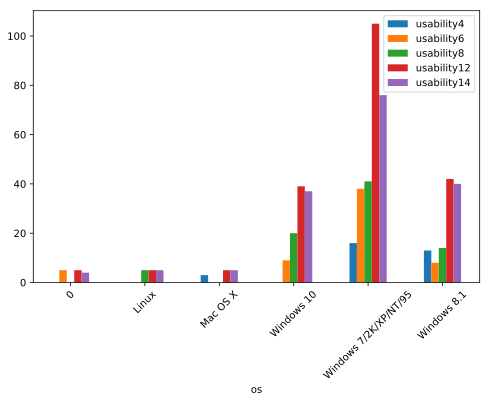

In [6]:
graf1data = df[[x for x in df.columns if 'usability' in x] + ['os']].groupby('os').sum().plot(kind='bar', rot=45);

Обзор оценок удобства различных частей интерфейса в зависимости от покупаемого пользователем товара

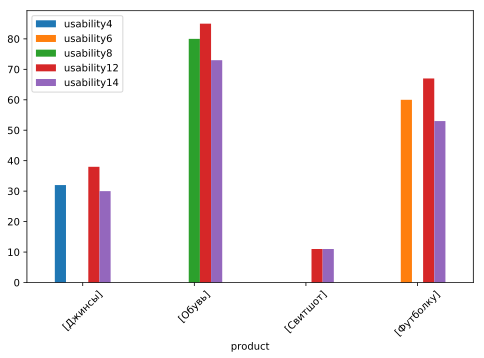

In [7]:
graf1data = df[[x for x in df.columns if 'usability' in x] + ['product']].groupby('product').sum().plot(kind='bar', rot=45);

Гистограмма оценок общего удобства интерфейса

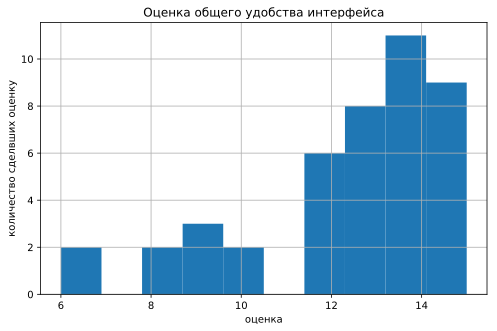

In [8]:
ax = df.us_sum.hist()
ax.set_title('Оценка общего удобства интерфейса')
ax.set_xlabel('оценка')
ax.set_ylabel('количество сделвших оценку')

## Seaborn

In [9]:
import seaborn as sns

Коореляции основных показателей

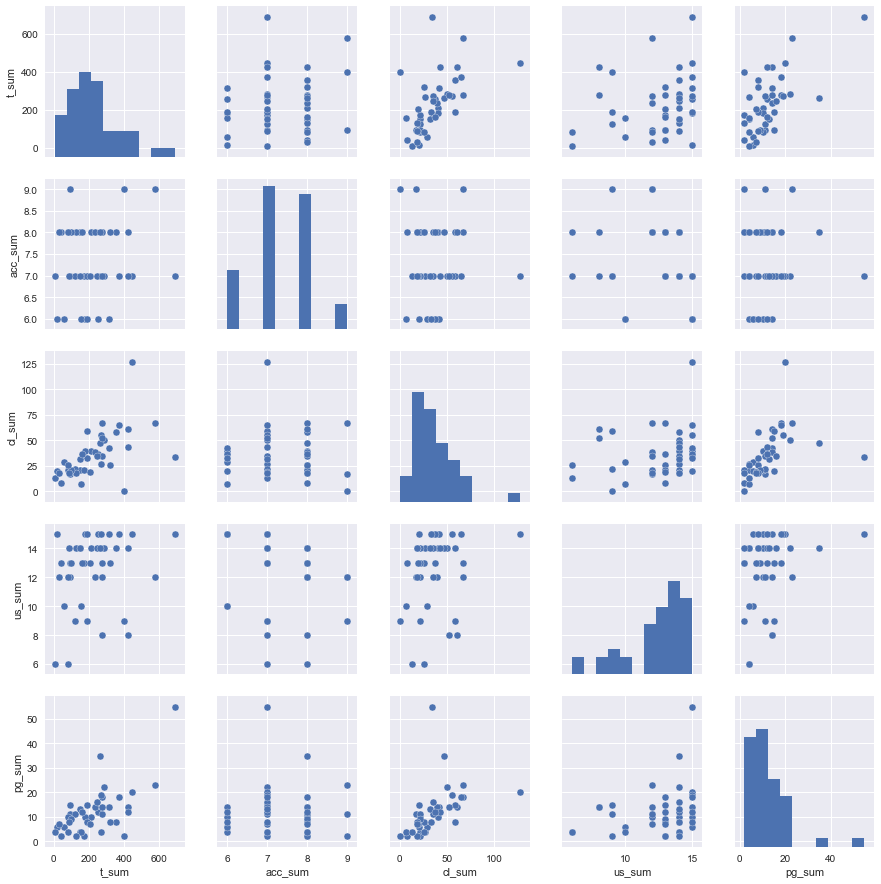

In [10]:
# c svg pairplot браузер начинает тормозить
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    df[[x for x in df.columns if 'sum' in x]]);
sns_plot.savefig('pairplot.png')


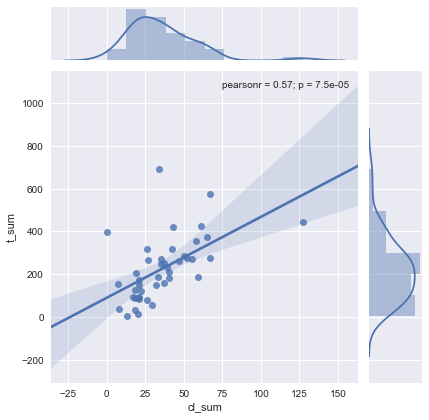

In [11]:
sns.jointplot(x='cl_sum', y='t_sum', 
              data=df, kind='reg');

## ggplot

In [12]:
import ggplot

Распределение оценок удобства сайта покупателей разных товаров

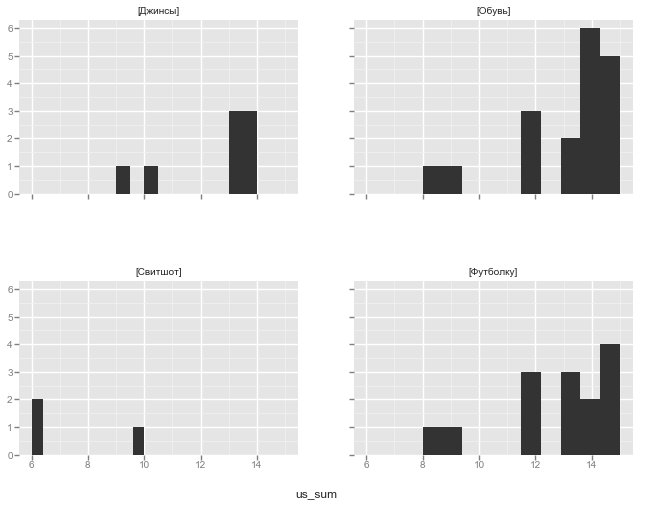

<ggplot: (198756758613)>

In [13]:
ggplot.ggplot(ggplot.aes('us_sum'), data = df) + ggplot.geom_histogram() + ggplot.facet_wrap('product') 